In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [2]:
# Homocidios en Colombia desde Marzo 2010 hasta Junio de 2019

In [3]:
datos = pd.read_csv("datosTotal.csv")

In [4]:
# print(datos.head())

In [5]:
# print(datos.head(10))

In [6]:
print(datos.columns)

Index(['FECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'DIA', 'BARRIO', 'ZONA',
       'CLASE SITIO', 'ARMA EMPLEADA', 'MOVIL AGRESOR', 'MOVIL VICTIMA',
       'EDAD', 'SEXO', 'ESTADO CIVIL', 'PAIS NACE', 'CLASE EMPLEADO',
       'PROFESIONES', 'ESCOLARIDAD', 'CODIGO DANE', 'CANTIDAD', 'H', 'M'],
      dtype='object')


In [7]:
edades=datos[["EDAD"]]
print(edades.head(10))

   EDAD
0  49.0
1  32.0
2  33.0
3  23.0
4  23.0
5  51.0
6  25.0
7  27.0
8  40.0
9  42.0


32.10038064592081
12.81431365802848


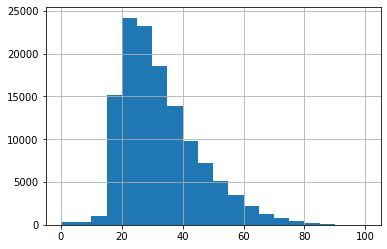

In [8]:
print(edades["EDAD"].mean())
print(edades["EDAD"].std())
edades["EDAD"].hist(bins=20)

In [9]:
datosXdia = datos[["DIA", "CANTIDAD"]]
print(datosXdia.shape)

(127719, 2)


In [10]:
print(datosXdia.head(10))

       DIA  CANTIDAD
0  Viernes         1
1  Viernes         1
2  Viernes         1
3  Viernes         1
4  Viernes         1
5  Viernes         1
6  Viernes         1
7  Viernes         1
8  Viernes         1
9  Viernes         1


In [11]:
datosXdia = datosXdia.groupby(["DIA"])["CANTIDAD"].sum()

In [12]:
print(datosXdia)

DIA
Domingo      26920
Jueves       15522
Lunes        18244
Martes       15546
Miércoles    15289
Sábado       20029
Viernes      16546
Name: CANTIDAD, dtype: int64


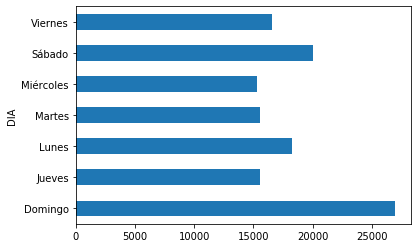

In [13]:
datosXdia.plot.barh()

In [14]:
#Dataframe con dia, cantidad y hora

In [15]:
datosXdiaHora = datos[["DIA", "CANTIDAD","H"]]
print(datosXdiaHora.shape)

(127719, 3)


In [16]:
print(datosXdiaHora.head(10))

       DIA  CANTIDAD   H
0  Viernes         1  14
1  Viernes         1   8
2  Viernes         1   2
3  Viernes         1  11
4  Viernes         1  11
5  Viernes         1  16
6  Viernes         1  20
7  Viernes         1  21
8  Viernes         1  17
9  Viernes         1   1


In [17]:
print(datosXdiaHora.describe())

            CANTIDAD              H
count  127719.000000  127719.000000
mean        1.002952      13.194200
std         0.075700       7.131218
min         1.000000       0.000000
25%         1.000000       7.000000
50%         1.000000      15.000000
75%         1.000000      20.000000
max        14.000000      23.000000


(127719, 2)
SEXO
FEMENINO      10711
MASCULINO    117369
Name: CANTIDAD, dtype: int64


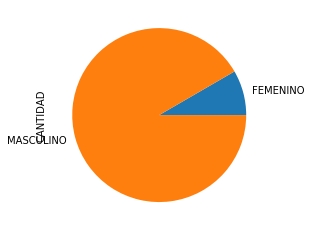

In [18]:
datosXsexo = datos[["SEXO", "CANTIDAD"]]
print(datosXsexo.shape)
datosXsexo = datosXsexo.groupby(["SEXO"])["CANTIDAD"].sum()
print(datosXsexo.head(10))
datosXsexo.plot.pie()

(127719, 2)
ARMA EMPLEADA
ACIDO                                     6
ALMOHADA                                 44
ARMA BLANCA                           25264
ARMA DE FUEGO                         96670
ARTEFACTO EXPLOSIVO/CARGA DINAMITA      484
ARTEFACTO INCENDIARIO                    19
BOLSA PLASTICA                          189
CARRO BOMBA                              26
CASA BOMBA                               18
CILINDRO BOMBA                           52
Name: CANTIDAD, dtype: int64


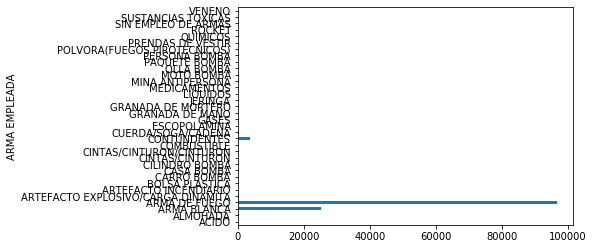

In [19]:
datosXsexo = datos[["ARMA EMPLEADA", "CANTIDAD"]]
print(datosXsexo.shape)
datosXsexo = datosXsexo.groupby(["ARMA EMPLEADA"])["CANTIDAD"].sum()
print(datosXsexo.head(10))
datosXsexo.plot.barh()

In [20]:
#Tabla Pivote:)
datosXdiaHora = datosXdiaHora.pivot_table(values="CANTIDAD", index=['DIA'], columns=['H'],aggfunc=np.sum)
print(datosXdiaHora)

H            0     1     2     3     4     5    6    7    8    9   ...   14  \
DIA                                                                ...        
Domingo    1684  1693  1701  1551  1354  1148  940  773  751  735  ...  769   
Jueves      521   372   271   239   258   341  510  464  517  564  ...  566   
Lunes      1128   931   750   617   464   476  645  556  578  608  ...  642   
Martes      555   360   319   247   255   344  504  441  557  511  ...  631   
Miércoles   561   358   258   237   215   297  484  455  511  530  ...  601   
Sábado      847   629   510   477   407   477  534  492  560  490  ...  772   
Viernes     596   429   299   290   261   396  520  482  494  503  ...  640   

H           15   16   17    18    19    20    21    22    23  
DIA                                                           
Domingo    841  866  958  1071  1429  1675  1639  1219  1082  
Jueves     679  737  720   910  1211  1492  1229   819   607  
Lunes      635  706  802   841  1188

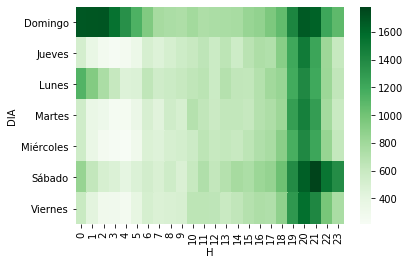

In [21]:
sns.heatmap(datosXdiaHora, cmap="Greens")

SEXO                                FEMENINO  MASCULINO
ARMA EMPLEADA                                          
ACIDO                                    3.0        3.0
ALMOHADA                                30.0       14.0
ARMA BLANCA                           2823.0    22437.0
ARMA DE FUEGO                         6538.0    90121.0
ARTEFACTO EXPLOSIVO/CARGA DINAMITA      31.0      453.0
ARTEFACTO INCENDIARIO                    3.0       16.0
BOLSA PLASTICA                          35.0      154.0
CARRO BOMBA                              3.0       23.0
CASA BOMBA                               NaN       18.0
CILINDRO BOMBA                           5.0       47.0
CINTAS/CINTURON                          1.0        6.0
CINTAS/CINTURON/CINTURON                14.0       32.0
COMBUSTIBLE                             12.0       68.0
CONTUNDENTES                           889.0     2940.0
CUERDA/SOGA/CADENA                     144.0      306.0
ESCOPOLAMINA                             NaN    

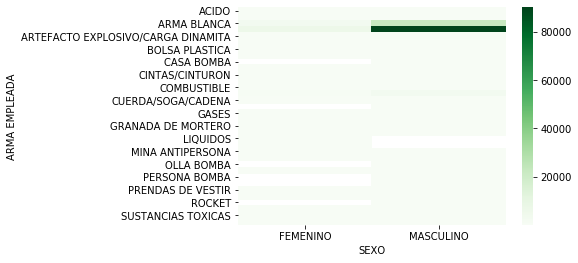

In [27]:
#Arma empleada Vrs Genero
datosXarmaGenero = datos[["ARMA EMPLEADA", "CANTIDAD","SEXO"]]
datosXarmaGenero = datosXarmaGenero.pivot_table(values="CANTIDAD", index=['ARMA EMPLEADA'], columns=['SEXO'],aggfunc=np.sum)
print(datosXarmaGenero)
sns.heatmap(datosXarmaGenero, cmap="Greens")

In [28]:
datosDomingo = datos[datos["DIA"]=="DOMINGO"]